In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('residential_electricity_cost_pred.csv')

X=df[['area', 'water_cons', 'ppl']].values
y=df['ele_cost'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.3, random_state=42)

print(X_train.shape, X_test.shape)

(2757, 3) (1182, 3)


In [184]:
## feature scaling 
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)
df.head(20)

,area,type,water_cons,ppl,ele_cost
0,966,Residential,1000.0,35,1575.0
1,4926,Residential,5990.0,185,4301.0
2,3671,Residential,2803.0,139,3661.0
3,630,Residential,1000.0,41,1390.0
4,2185,Residential,2170.0,117,2599.0
5,1269,Residential,1194.0,124,2626.0
6,2933,Residential,4817.0,260,4140.0
7,4617,Residential,8168.0,175,4479.0
8,2547,Residential,3903.0,253,3084.0
9,3247,Residential,5123.0,225,3742.0


In [174]:
## linear regression model 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_scaled, y_train)

print(lr.coef_, lr.intercept_)

[649.26100592 100.31265161 524.82136413] 2976.1084512150887


In [176]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_test_scaled = scale.transform(X_test)
ytest_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  226.2144634681083
Mean squared error:  80409.12611813228
R2 score is:  0.9417969335075789


In [208]:
ytrain_pred = lr.predict(X_scaled)
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

Mean absolute error:  234.90146926957732
Mean squared error:  82875.20205796191
R2 score is:  0.9386427175158303


(2757, 3)

In [234]:
df1=df[(df['area'] == 4343) & (df['water_cons'] == 6055) & (df['ppl'] == 277)]
df1_avg = df['ele_cost'].mean()
print("Average cost:", df1_avg) 

Average cost: 2992.4653465346537


In [238]:
print(ytest_pred)
print(y_test)

[3458.98201589 1821.76125608 4901.27668482 ... 3689.54896504 2949.20142457
 4534.82297169]
[3778. 2093. 4241. ... 3765. 3166. 4715.]


In [244]:
X_scaled = scale.transform(X)
y_pred = lr.predict(X_scaled)

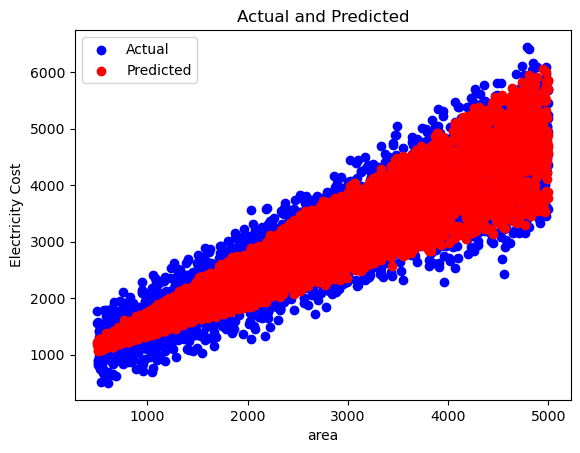

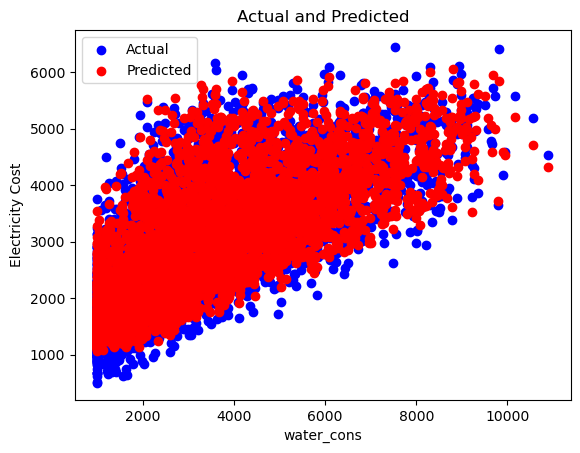

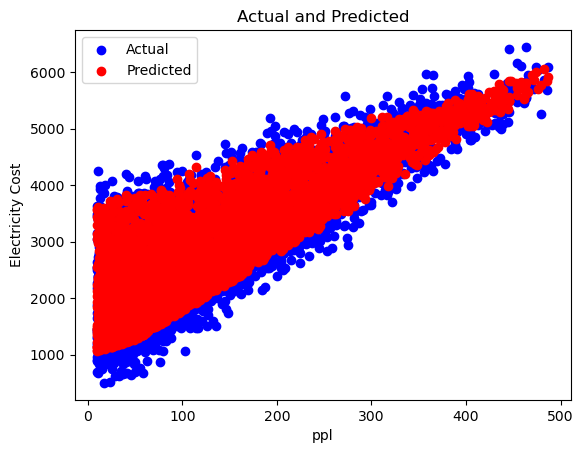

In [254]:
features=['area', 'water_cons', 'ppl']
for f in features:
    plt.scatter(df[f], y, color='blue', label="Actual")
    plt.scatter(df[f], y_pred, color='red', label="Predicted")
    plt.xlabel(f)
    plt.ylabel("Electricity Cost")
    plt.title("Actual and Predicted")
    plt.legend()
    plt.show()